# Test Protocol for the Benchmark Analysis

The revised idea for the benchmark analysis pipeline, is to ask from the user the path to the directory that holds data files constituting the benchmark data. This input is fed into the pipeline and the results (tool outputs, visualizations are engendered and stored on physical drive as well). 

Let us commence by instituting the work environment. The tools in question are **Chipenrich**, **Broadenrich**, **Seq2pathway**, **Enrichr**, and **GREAT**. We now install the tools and load their respective libraries. 

The following function code installs the R packages for Chipenrich, Broadenrich, and Seq2pathway. The tools *Enrichr* and *GREAT* are only available as web-interfaces and so the input-output for these have to be catered externally. 

## Installing Tool Packages

In [1]:
source("./protocolFunctions/installPackagesBenchmark.R")
installPackagesBenchmark()

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'seq2pathway'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpE6p2Np/downloaded_packages


Old packages: 'Rdpack', 'bibtex', 'broom', 'BH', 'DBI', 'DT', 'MASS',
  'RSQLite', 'SparseM', 'boot', 'caTools', 'digest', 'e1071', 'foreign',
  'latticeExtra', 'mime', 'pillar', 'quantreg', 'recipes', 'repr',
  'reticulate', 'robust', 'rsconnect', 'vctrs'

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'broadenrich'

Warning message:
“package ‘broadenrich’ is not available (for R version 3.6.0)”
Old packages: 'Rdpack', 'bibtex', 'broom', 'BH', 'DBI', 'DT', 'MASS',
  'RSQLite', 'SparseM', 'boot', 'caTools', 'digest', 'e1071', 'foreign',
  'latticeExtra', 'mime', 'pillar', 'quantreg', 'recipes', 'repr',
  'reticulate', 'robust', 'rsconnect', 'vctrs'

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'chipenrich'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpE6p2Np/downloaded_packages


Old packages: 'Rdpack', 'bibtex', 'broom', 'BH', 'DBI', 'DT', 'MASS',
  'RSQLite', 'SparseM', 'boot', 'caTools', 'digest', 'e1071', 'foreign',
  'latticeExtra', 'mime', 'pillar', 'quantreg', 'recipes', 'repr',
  'reticulate', 'robust', 'rsconnect', 'vctrs'













Warning message:
“'memory.size()' is Windows-specific”


[1] Inf

Now that we have all the R-based tools synced in, we shall now move towards assembling the test data. The BED files for the respective samples are available at a local folder. However, for the fuller version of the analysis pipeline I shall have the user input the path for the folder that holds the data files for the benchmark data.  

## Installing Support Packages

### Devtools

In [2]:
## 'devtools' provides multiple utilitarian functionalities. Let us install this package as well.

BiocManager::install('devtools')
library(devtools)



Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'devtools'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpE6p2Np/downloaded_packages


Old packages: 'Rdpack', 'bibtex', 'broom', 'BH', 'DBI', 'DT', 'MASS',
  'RSQLite', 'SparseM', 'boot', 'caTools', 'digest', 'e1071', 'foreign',
  'latticeExtra', 'mime', 'pillar', 'quantreg', 'recipes', 'repr',
  'reticulate', 'robust', 'rsconnect', 'vctrs'

Loading required package: usethis



### GenomicRanges

In [3]:
BiocManager::install('GenomicRanges')
library(GenomicRanges)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'GenomicRanges'




The downloaded binary packages are in
	/var/folders/hm/c3_fjypn62v5xh5b5ygv267m0000gn/T//RtmpE6p2Np/downloaded_packages


Old packages: 'Rdpack', 'bibtex', 'broom', 'BH', 'DBI', 'DT', 'MASS',
  'RSQLite', 'SparseM', 'boot', 'caTools', 'digest', 'e1071', 'foreign',
  'latticeExtra', 'mime', 'pillar', 'quantreg', 'recipes', 'repr',
  'reticulate', 'robust', 'rsconnect', 'vctrs'

Warning message:
“package ‘GenomicRanges’ was built under R version 3.6.1”
Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated

## Importing Data

The function **dataImportClean** solicits the directory path from the user that holds the constituent BED files for the benchmark dataset. The input (as depicted below) must be made as a character expression followed by a backslash. The files must have the fundamental attributes of a genomic region, viz. *chrom*, *start*, and *end*. The data is sourced as GRanges objects for subsequent manipulations. 

The dataset in question has the following profile, amongst other attributes. It is a mix of assorted diseases that act as our target pathways for a given instance of comparison of enrichment tools. (See https://doi.org/10.1371/journal.pone.0079217 for methodological reference) 

<img src="testData.png" width="800"/>

In [4]:
source("./protocolFunctions/dataImportClean.R")
dataImportClean("./testData/")

✔ Setting active project to '/Users/mei/Desktop/GSABenchmarkTestAnalysis'


The list variable 'samplesInBED' holds the data files. Let us look at the data.

In [1]:
samplesInBED <- readRDS("samplesInBED.rds")
ChIPSeqSamples <- readRDS("ChIPSeqSamples.rds")

In [2]:
ChIPSeqSamples

[1] "GSE84618"   "GSM1847178" "GSM2058021" "GSM2058022" "GSM2058023"
 [6] "GSM2101436" "GSM2101437" "GSM2101438" "GSM2101439" "GSM2298950"

In [6]:
samplesInBED

GRangesList object of length 10:
$GSE84618 
GRanges object with 9789 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 181153247-181153976      *
     [2]     chr1   54590230-54590888      *
     [3]     chr1 183400489-183400671      *
     [4]     chr1   55420208-55420369      *
     [5]     chr1   20114346-20114575      *
     ...      ...                 ...    ...
  [9785]     chrX   68346920-68347399      *
  [9786]     chrX   70474572-70474901      *
  [9787]     chrX   53105208-53105440      *
  [9788]     chrX   20065462-20065651      *
  [9789]     chrX   77395786-77395955      *

...
<9 more elements>
-------
seqinfo: 64 sequences from hg38 genome; no seqlengths

So, we see that we have 10 samples listed in GRanges format. These will be our input to the tools and the basis for comparison.

## Executing Chipenrich, Broadenrich, and Seq2pathway

While executing the following function we make an attempt to save the results as R objects and concurrently remove them from active memory for sufficiency. This wrapper script holds the executives for the three tools with specific parameters.

In [9]:
source("./protocolFunctions/executeChipenrichBroadenrichSeq2pathway.R")
executeChipenrichBroadenrichSeq2pathway("./testData/")

Reading peaks from ./testData/GSE84618.bed



[1] "python process start: 2020-01-06 09:38:53.071541"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:39:13.737955"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:39:16.400911"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM1847178.bed



[1] "python process start: 2020-01-06 09:44:35.239472"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:44:55.212420"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:45:00.321482"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058021.bed



[1] "python process start: 2020-01-06 09:51:59.340023"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 09:52:18.782591"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 09:52:46.553804"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058022.bed



[1] "python process start: 2020-01-06 10:00:33.794035"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:00:53.341784"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:01:10.678266"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2058023.bed



[1] "python process start: 2020-01-06 10:09:00.015946"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:09:21.080501"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:09:48.216724"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2101436.bed



[1] "python process start: 2020-01-06 10:18:16.079567"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:18:36.549075"
[5] "Start Annotation"                                
[6] "Un_gl000224 Chromosome not registered"           
[7] "Finish Annotation"                               
[8] "python process end: 2020-01-06 10:18:36.646784"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSM2101437.bed



 [1] "python process start: 2020-01-06 10:20:51.431282"
 [2] "Load Reference"                                  
 [3] "Check Reference files"                           
 [4] "fixed reference done: 2020-01-06 10:21:11.415655"
 [5] "Start Annotation"                                
 [6] "1_gl000191_random Chromosome not registered"     
 [7] "1_gl000191_random Chromosome not registered"     
 [8] "1_gl000192_random Chromosome not registered"     
 [9] "1_gl000192_random Chromosome not registered"     
[10] "1_gl000192_random Chromosome not registered"     
[11] "1_gl000192_random Chromosome not registered"     
[12] "17_ctg5_hap1 Chromosome not registered"          
[13] "17_ctg5_hap1 Chromosome not registered"          
[14] "17_ctg5_hap1 Chromosome not registered"          
[15] "17_ctg5_hap1 Chromosome not registered"          
[16] "17_ctg5_hap1 Chromosome not registered"          
[17] "17_ctg5_hap1 Chromosome not registered"          
[18] "17_ctg5_hap1 Chromosome not registered"   

Reading peaks from ./testData/GSM2101438.bed



  [1] "python process start: 2020-01-06 10:29:31.210499"
  [2] "Load Reference"                                  
  [3] "Check Reference files"                           
  [4] "fixed reference done: 2020-01-06 10:29:51.426844"
  [5] "Start Annotation"                                
  [6] "17_gl000203_random Chromosome not registered"    
  [7] "17_gl000205_random Chromosome not registered"    
  [8] "17_gl000205_random Chromosome not registered"    
  [9] "17_gl000205_random Chromosome not registered"    
 [10] "17_gl000205_random Chromosome not registered"    
 [11] "17_gl000205_random Chromosome not registered"    
 [12] "17_gl000205_random Chromosome not registered"    
 [13] "17_gl000205_random Chromosome not registered"    
 [14] "17_gl000205_random Chromosome not registered"    
 [15] "17_gl000205_random Chromosome not registered"    
 [16] "17_gl000205_random Chromosome not registered"    
 [17] "17_gl000205_random Chromosome not registered"    
 [18] "17_gl000205_random Chrom

Reading peaks from ./testData/GSM2101439.bed



 [1] "python process start: 2020-01-06 10:33:07.770147"
 [2] "Load Reference"                                  
 [3] "Check Reference files"                           
 [4] "fixed reference done: 2020-01-06 10:33:28.521632"
 [5] "Start Annotation"                                
 [6] "17_ctg5_hap1 Chromosome not registered"          
 [7] "17_ctg5_hap1 Chromosome not registered"          
 [8] "17_ctg5_hap1 Chromosome not registered"          
 [9] "17_ctg5_hap1 Chromosome not registered"          
[10] "17_ctg5_hap1 Chromosome not registered"          
[11] "17_ctg5_hap1 Chromosome not registered"          
[12] "17_ctg5_hap1 Chromosome not registered"          
[13] "17_ctg5_hap1 Chromosome not registered"          
[14] "17_ctg5_hap1 Chromosome not registered"          
[15] "17_ctg5_hap1 Chromosome not registered"          
[16] "17_ctg5_hap1 Chromosome not registered"          
[17] "17_ctg5_hap1 Chromosome not registered"          
[18] "17_ctg5_hap1 Chromosome not registered"   

Reading peaks from ./testData/GSM2298950.bed



[1] "python process start: 2020-01-06 10:38:38.928283"
[2] "Load Reference"                                  
[3] "Check Reference files"                           
[4] "fixed reference done: 2020-01-06 10:38:58.284831"
[5] "Start Annotation"                                
[6] "Finish Annotation"                               
[7] "python process end: 2020-01-06 10:38:58.445859"  
[1] "Start test.............."
[1] "Fisher's exact test done"


Reading peaks from ./testData/GSE84618.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM1847178.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: ChIP-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: ChIP-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2058021.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for ge

Applying correction for geneset GO:0051973 with 35 genes...

Applying correction for geneset GO:0052126 with 35 genes...

Applying correction for geneset GO:0052192 with 35 genes...

Applying correction for geneset GO:0060049 with 19 genes...

Applying correction for geneset GO:0060390 with 16 genes...

Applying correction for geneset GO:0060544 with 20 genes...

Applying correction for geneset GO:0061157 with 19 genes...

Applying correction for geneset GO:0070200 with 15 genes...

Applying correction for geneset GO:0070242 with 16 genes...

Applying correction for geneset GO:0070584 with 20 genes...

Applying correction for geneset GO:0070828 with 15 genes...

Applying correction for geneset GO:0070987 with 19 genes...

Applying correction for geneset GO:0071173 with 29 genes...

Applying correction for geneset GO:0071174 with 29 genes...

Applying correction for geneset GO:0071294 with 18 genes...

Applying correction for geneset GO:0071459 with 19 genes...

Applying correction for 

Applying correction for geneset hsa00532 with 22 genes...

Applying correction for geneset hsa03410 with 33 genes...

Applying correction for geneset hsa03430 with 23 genes...

Applying correction for geneset hsa04710 with 22 genes...

Applying correction for geneset hsa05213 with 52 genes...

Reading peaks from ./testData/GSM2058022.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Applying correction for geneset GO:0000028 with 15 genes...

Applying correction for geneset GO:0000042 with 18 genes...

Applying correction for geneset GO:0000289 with 34 genes...

Applying correction for geneset GO:0002183 with 22 genes...

Applying correction for geneset GO:0002190 with 15 genes...

Applying correction for geneset GO:0006098 with 18 genes...

Applying correction for geneset GO:0006144 with 20 genes...

Applying correction for geneset GO:0006271 with 16 genes...

Applying correction for geneset GO:0006

Applying correction for geneset GO:0019372 with 15 genes...

Applying correction for geneset GO:0019682 with 23 genes...

Applying correction for geneset GO:0021756 with 16 genes...

Applying correction for geneset GO:0030277 with 16 genes...

Applying correction for geneset GO:0031112 with 23 genes...

Applying correction for geneset GO:0031116 with 20 genes...

Applying correction for geneset GO:0031293 with 16 genes...

Applying correction for geneset GO:0031440 with 20 genes...

Applying correction for geneset GO:0032469 with 21 genes...

Applying correction for geneset GO:0032516 with 15 genes...

Applying correction for geneset GO:0032786 with 23 genes...

Applying correction for geneset GO:0032878 with 22 genes...

Applying correction for geneset GO:0032922 with 55 genes...

Applying correction for geneset GO:0033119 with 25 genes...

Applying correction for geneset GO:0033522 with 19 genes...

Applying correction for geneset GO:0033866 with 16 genes...

Applying correction for 

Applying correction for geneset GO:0002756 with 33 genes...

Applying correction for geneset GO:0003222 with 16 genes...

Applying correction for geneset GO:0006388 with 15 genes...

Applying correction for geneset GO:0006743 with 16 genes...

Applying correction for geneset GO:0006744 with 15 genes...

Applying correction for geneset GO:0031958 with 17 genes...

Applying correction for geneset GO:0032011 with 16 genes...

Applying correction for geneset GO:0032012 with 16 genes...

Applying correction for geneset GO:0032469 with 21 genes...

Applying correction for geneset GO:0033866 with 16 genes...

Applying correction for geneset GO:0034030 with 16 genes...

Applying correction for geneset GO:0034033 with 16 genes...

Applying correction for geneset GO:0034315 with 16 genes...

Applying correction for geneset GO:0034453 with 18 genes...

Applying correction for geneset GO:0035561 with 21 genes...

Applying correction for geneset GO:0035635 with 18 genes...

Applying correction for 

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: Broad-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2101439.bed

Assigning peaks to genes with assign_peak_segments(...) ..

Calculating peak overlaps with gene loci..

Test: Broad-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Molecular Function

Running tests..

Test: Broad-Enrich

Genesets: KEGG Pathways

Running tests..

Reading peaks from ./testData/GSM2298950.bed

Assigning peaks to genes with assign_peak_segments(...) ..

Calculating peak overlaps with gene loci..

Test: Broad-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Test: Broad-Enrich

Genesets: Gene Ontology Cellular Component

Running tests..

Test: Broad-Enrich

Genesets:

## Pruning Results from Chipenrich, Broadenrich, and Seq2pathway

Since we shall majorly be interested in the enrichment terms and their statistical significance values, we'll extract these from the other attributes of the results from the tools.

In [30]:
source("./protocolFunctions/extractingValuedResults.R")
extractingValuedResults()

Now that we have the results from Chipenrich, Broadenrich, and Seq2pathway, we move towards framing results from Enrichr and GREAT that we have manually compiled. Just to reiterate, both the tools are available as a web-interface as of now. (GREAT: http://bejerano.stanford.edu/great/public/html/index.php, Enrichr: http://amp.pharm.mssm.edu/Enrichr/)

## Structuring Results from Enrichr and GREAT

### Enrichr

In [2]:
source("./protocolFunctions/enrichrResultsCompilation.R")
enrichrResultsCompilation()

At this point, we have compiled results from different databases of Enrichr, viz. GO : Cellular Component, Molecular Function, Biological Process, and KEGG. For computational convenience, we shall combine all these results together for each sample in our benchmark dataset. Another task to perform here is to extract GO and KEGG ids from the enrichment terms. The results contain merged information and we prune the term definition.

In [3]:
source("./protocolFunctions/enrichrPostprocessing.R")
enrichrPostprocessing()

   [1] negative regulation of cellular response to hypoxia (GO:1900038)                                                                                             
   [2] synapsis (GO:0007129)                                                                                                                                        
   [3] positive regulation of striated muscle contraction (GO:0045989)                                                                                              
   [4] intermediate filament organization (GO:0045109)                                                                                                              
   [5] positive regulation of macrophage differentiation (GO:0045651)                                                                                               
   [6] membrane lipid catabolic process (GO:0046466)                                                                                                                
   [7] reg

Loading required package: GenomicRanges

Warning message:
“package ‘GenomicRanges’ was built under R version 3.6.1”
Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, uniqu

### GREAT

The following function will pick up the results from a local directory (as results from GREAT have to be manually curated) and restructure them to align with the current analysis.

In [4]:
source("./protocolFunctions/greatResultsCompilation.R")
greatResultsCompilation()

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'GO.db'

installing the source package ‘GO.db’




## Assembling Enrichment Terms for Diseases (Target) Pathways

Now that we have the results from all the tools, we shall proceed towards comparing the tools for their efficacy in pathway analysis. But the means to compare has to be assembled first. The output from tools have been restructured and amongst other data, we've managed to pull out the two entities that fuel the downstream analysis: *enrichment terms*, and *p-value*.

These results are due on validation from the actual enrichment terms associated with the disease (target) pathways that are a part of the benchmark dataset. To accomplish that, we are going to call our manually curated enrichment terms corresponding to four diseases (Gastric Cancer, Prostate Cancer, Alzheimers Disease, and Colorectal Cancer), used in this test case. 

For KEGG terms affiliated with the said disease, we shall manually curate the KEGG terms associated with the diseases and use them for reference. The idea is to save the KEGG terms for the disease pathway as well as their subpathways. This information can be sourced from the KEGG webpage.

We shall now pool both GO and KEGG terms together for every disease to gain a consolidated list of actual enrichment terms. (See function definition)

In [2]:
source("./protocolFunctions/diseaseTerms.R")
diseaseTerms()

The individual disease enrichment terms are as follows:

In [4]:
readRDS("colorectalCancerPool")

[1] "GO:0097259" "GO:0045517" "GO:0045544" "GO:0030876" "GO:0004501"
  [6] "GO:0042015" "GO:0042016" "GO:0042237" "GO:0072618" "GO:0032624"
 [11] "GO:0032664" "GO:0050051" "GO:0050052" "GO:0045387" "GO:0045389"
 [16] "GO:0045388" "GO:0036392" "GO:0032704" "GO:0032744" "GO:0097258"
 [21] "GO:0052635" "GO:0102245" "GO:1903885" "GO:1903886" "GO:1903884"
 [26] "GO:1900579" "GO:1900580" "GO:1900581" "GO:1901947" "GO:1901949"
 [31] "GO:1901948" "GO:0047006" "GO:0036203" "GO:0050638" "GO:0050598"
 [36] "GO:0005641" "GO:0004110" "GO:0035274" "GO:0050597" "GO:0035574"
 [41] "GO:0009311" "GO:0009420" "GO:0033704" "GO:0033703" "GO:0102353"
 [46] "GO:0034773" "GO:0034772" "GO:0034771" "GO:0042799" "GO:0035575"
 [51] "GO:0052869" "GO:0070918" "GO:0042382" "GO:0070512" "GO:0070510"
 [56] "GO:0070492" "GO:0030046" "GO:0004661" "GO:1990889" "GO:0031050"
 [61] "GO:0009312" "GO:0009313" "GO:0016607" "GO:0097518" "GO:0097414"
 [66] "GO:0050604" "GO:0051691" "GO:0051502" "GO:1990029" "GO:0035078"
 [71] "GO:0034770" "GO:0016707" "GO:0043818" "GO:0047086" "GO:0009275"
 [76] "GO:0008386" "GO:0098788" "GO:0070012" "GO:0019369" "GO:0044461"
 [81] "GO:0030084" "GO:0030257" "GO:0070511" "GO:0098017" "GO:0098018"
 [86] "GO:0005635" "GO:0035672" "GO:0035673" "GO:0016443" "GO:0044199"
 [91] "GO:0010207" "GO:0039617" "GO:0050544" "GO:0051692" "GO:0090374"
 [96] "GO:1990040" "GO:0035100" "GO:0035077" "GO:0005518" "GO:0030169"
[101] "GO:0032963" "GO:0032964" "GO:0034361" "GO:0044176" "GO:0019030"
[106] "GO:0039618" "GO:0051501" "GO:0075526" "GO:0090088" "GO:0001745"
[111] "GO:0015772" "GO:0006857" "GO:0034189" "GO:0015334" "GO:0043781"
[116] "GO:0047044" "GO:0030119" "GO:0022894" "GO:0034362" "GO:0016286"
[121] "GO:0035061" "GO:0034709" "GO:0047442" "GO:0047024" "GO:0004508"
[126] "hsa05210"   "hsa04310"   "hsa04110"   "hsa04210"   "hsa04115"  
[131] "hsa04151"   "hsa04010"   "hsa04350"   "hsa04012"   "hsa04150"

In [5]:
readRDS("gastricCancerPool")

[1] "GO:0035483" "GO:0035482" "GO:0120060" "GO:1990768" "GO:0001696"
 [6] "GO:1905333" "GO:0120061" "GO:0120062" "GO:0016519" "GO:0038192"
[11] "GO:0001699" "GO:0001698" "GO:0001697" "GO:0031767" "GO:0060453"
[16] "GO:1904344" "GO:1904345" "GO:1904346" "GO:1903639" "GO:0060455"
[21] "GO:0060454" "GO:1903640" "GO:1903641" "GO:0061102" "GO:0120063"
[26] "GO:0046581" "GO:0008900" "GO:1904453" "GO:1904452" "GO:0120064"
[31] "GO:0120065" "GO:0120066" "GO:0120067" "GO:1904451" "GO:0046691"
[36] "hsa05226"   "hsa05120"   "hsa04115"   "hsa04110"   "hsa04310"  
[41] "hsa04151"   "hsa04350"   "hsa04520"   "hsa04010"

In [6]:
readRDS("alzheimersDiseasePool")

[1] "GO:0042982" "GO:0042983" "GO:0042987" "GO:0050435" "GO:0048156"
 [6] "GO:0044548" "GO:0048153" "GO:0048152" "GO:0106003" "hsa05010"  
[11] "hsa00190"   "hsa04210"   "hsa04020"

In [7]:
readRDS("prostateCancerPool")

[1] "GO:0060514" "GO:0030850" "GO:0060526" "GO:0060525" "GO:0060523"
 [6] "GO:0060515" "GO:0060512" "GO:0060741" "GO:0060740" "GO:0060737"
[11] "GO:0060736" "GO:0060527" "GO:0060442" "GO:0044345" "GO:0060531"
[16] "GO:0060530" "GO:0060524" "GO:0060521" "GO:0060520" "GO:0060768"
[21] "GO:0060767" "GO:0060782" "GO:0060781" "GO:0060783" "GO:0060743"
[26] "GO:0060742" "GO:0060739" "GO:0060738" "GO:0060687" "GO:0060529"
[31] "GO:0060528" "GO:0060770" "GO:0060769" "GO:0060513" "GO:0060516"
[36] "GO:0036029" "GO:0060686" "GO:0060685" "GO:0035260" "hsa05215"  
[41] "hsa04110"   "hsa04210"   "hsa04151"   "hsa05202"   "hsa04115"  
[46] "hsa04010"   "hsa04060"   "hsa00140"

We appropriately see that all diseases have a compendium of KEGG and GO terms; GO terms being higher. We have maximum number of enrichment terms available for *Colorectal Cancer*, that being the highest order cancer type and also widely studied.

## Evaluating Performance of Tools and Comparing Results


<img src="Evaluation.png" width="500"/>

We aim to interrogate the efficacies of the tools on the performance metrics on **Sensitivity**, **Specificity**, **Precision**, and **Prioritization**.

### Prioritization

The basis for this metric is to enlist ranks of the enrichment terms that matched in the tool results and ensure that the relevant terms are high in order with respect to the target pathway.

In [2]:
## We are basically catering to 5 tools and 4 disease pathways in this module. For the functions that follow, we shall enlist this information for use.
## The list entities follow the nomenclature of the data objects.

toolsResults <- c("chipenrichResultsShredded", "broadenrichResultsShredded","seq2pathwayResultsShredded","enrichrResultsShredded","greatResultsShredded")
diseasePools <- c("colorectalCancerPool", "alzheimersDiseasePool", "gastricCancerPool", "prostateCancerPool")


Let us also source the tools' results as well as the disease terms from the local directory to be used for comparison metrics' evaluation.

In [3]:
## Tool results

chipenrichResultsShredded <- readRDS("./results/Chipenrich/chipenrichResultsShredded")
broadenrichResultsShredded <- readRDS("./results/Broadenrich/broadenrichResultsShredded")
enrichrResultsShredded <- readRDS("./results/Enrichr/enrichrResultsShredded")
greatResultsShredded <- readRDS("./results/GREAT/greatResultsShredded")
seq2pathwayResultsShredded <- readRDS("./results/Seq2pathway/seq2pathwayResultsShredded")


## Disease Terms

alzheimersDiseasePool <- readRDS("alzheimersDiseasePool")
colorectalCancerPool <- readRDS("colorectalCancerPool")
gastricCancerPool <- readRDS("gastricCancerPool")
prostateCancerPool <- readRDS("prostateCancerPool")

The function *calculatePrioritization* takes the tool index as input and returns the corresponding prioritization values, for all given samples, against every disease pathway. 

In [10]:
## Let us create a consolidated list to hold all prioritization tables and we shall attempt to merge them 
## eventually to attain a grand prioritization table for all tools together.

source("./protocolFunctions/listToFrame.R")
source("./protocolFunctions/calculatePrioritization.R")

consolidatedPrioritization <- vector("list", length = length(toolsResults)) # our parent list
consolidatedPrioritization <- lapply(1:length(toolsResults), calculatePrioritization)

## For easy access, we shall name the list elements by tool names as they are in correspondence.

names(consolidatedPrioritization) <- toolsResults

In [11]:
## The resulting prioritization values are as follows. As noticeable, these have been calculated for each sample, 
## across given target pathways for each tool.

consolidatedPrioritization

$chipenrichResultsShredded
   colorectalCancerPool alzheimersDiseasePool gastricCancerPool
1             3.2262731              6.206597          3.226273
2             3.0526620              8.159722          3.052662
3             4.0798611              4.354745          8.752894
4             3.1394676              3.674769          8.376736
5             3.7471065              3.761574         10.228588
6             0.2170139             16.319444          5.324074
7             4.0364583              5.512153          4.470486
8            15.7696759              7.074653          7.740162
9             4.4849537              1.634838          4.484954
10            4.2100694             36.400463          4.210069
   prostateCancerPool    Median    Samples
1            3.660301  3.443287   GSE84618
2            3.052662  3.052662 GSM1847178
3            8.752894  6.553819 GSM2058021
4            8.376736  6.025752 GSM2058022
5           10.228588  6.995081 GSM2058023
6           16.319444 10.821759 GSM2101436
7            4.470486  4.470486 GSM2101437
8           27.835648 11.754919 GSM2101438
9           12.008102  4.484954 GSM2101439
10           4.210069  4.210069 GSM2298950

$broadenrichResultsShredded
   colorectalCancerPool alzheimersDiseasePool gastricCancerPool
1              0.853588              8.839699          0.853588
2              5.020255             52.604167          5.020255
3              6.076389             25.130208          2.618634
4              6.727431             20.442708          1.620370
5              7.826968             25.766782          1.678241
6              2.502894             21.817130         11.053241
7              3.125000             14.163773          3.125000
8              6.987847             26.171875         18.634259
9             15.914352              4.065394         10.894097
10             1.663773             38.946759          1.085069
   prostateCancerPool    Median    Samples
1            4.832176  2.842882   GSE84618
2            5.020255  5.020255 GSM1847178
3           11.979167  9.027778 GSM2058021
4           14.684606 10.706019 GSM2058022
5           13.527199 10.677083 GSM2058023
6            8.145255  9.599248 GSM2101436
7            3.125000  3.125000 GSM2101437
8           18.634259 18.634259 GSM2101438
9            1.331019  7.479745 GSM2101439
10          29.513889 15.588831 GSM2298950

$seq2pathwayResultsShredded
   colorectalCancerPool alzheimersDiseasePool gastricCancerPool
1              31.09436              62.97510          0.000000
2              27.77778              61.05263          4.678363
3              27.70020              60.87204          4.673696
4              27.70810              60.88940          4.874572
5              27.70193              60.83618          4.891923
6              38.06228               0.00000          0.000000
7              28.24891              61.18669          5.470333
8              97.63441               0.00000          0.000000
9              37.51169              51.44995          0.000000
10             71.92429               0.00000          0.000000
   prostateCancerPool   Median    Samples
1            46.29751  0.00000   GSE84618
2            43.53801 35.65789 GSM1847178
3            43.57367 35.63693 GSM2058021
4            43.61460 35.66135 GSM2058022
5            43.54380 35.62287 GSM2058023
6             0.00000  0.00000 GSM2101436
7            43.99421 36.12156 GSM2101437
8             0.00000  0.00000 GSM2101438
9            33.53601  0.00000 GSM2101439
10            0.00000  0.00000 GSM2298950

$enrichrResultsShredded
   colorectalCancerPool alzheimersDiseasePool gastricCancerPool
1                     0                     0                 0
2                     0                     0                 0
3                     0                     0                 0
4                     0                     0                 0
5                     0                     0     

Now that we have the data, we can proceed towards plotting a bargraph to visualize the results from each tool. The median values will be the representative for the same.

In [27]:
## We'll extract the median values here in a fresh collection.

library(dplyr)
plotPrioritization <- lapply(consolidatedPrioritization, function(x) x %>% select(Median))
plotPrioritization <- as.data.frame(plotPrioritization)
colnames(plotPrioritization) <- toolsResults
plotPrioritization$Samples <- ChIPSeqSamples                             

In [28]:
plotPrioritization

chipenrichResultsShredded broadenrichResultsShredded
1   3.443287                  2.842882                 
2   3.052662                  5.020255                 
3   6.553819                  9.027778                 
4   6.025752                 10.706019                 
5   6.995081                 10.677083                 
6  10.821759                  9.599248                 
7   4.470486                  3.125000                 
8  11.754919                 18.634259                 
9   4.484954                  7.479745                 
10  4.210069                 15.588831                 
   seq2pathwayResultsShredded enrichrResultsShredded greatResultsShredded
1   0.00000                   0                      0                   
2  35.65789                   0                      0                   
3  35.63693                   0                      0                   
4  35.66135                   0                      0                   
5  35.62287                   0                      0                   
6   0.00000                   0                      0                   
7  36.12156                   0                      0                   
8   0.00000                   0                      0                   
9   0.00000                   0                      0                   
10  0.00000                   0                      0                   
   Samples   
1  GSE84618  
2  GSM1847178
3  GSM2058021
4  GSM2058022
5  GSM2058023
6  GSM2101436
7  GSM2101437
8  GSM2101438
9  GSM2101439
10 GSM2298950

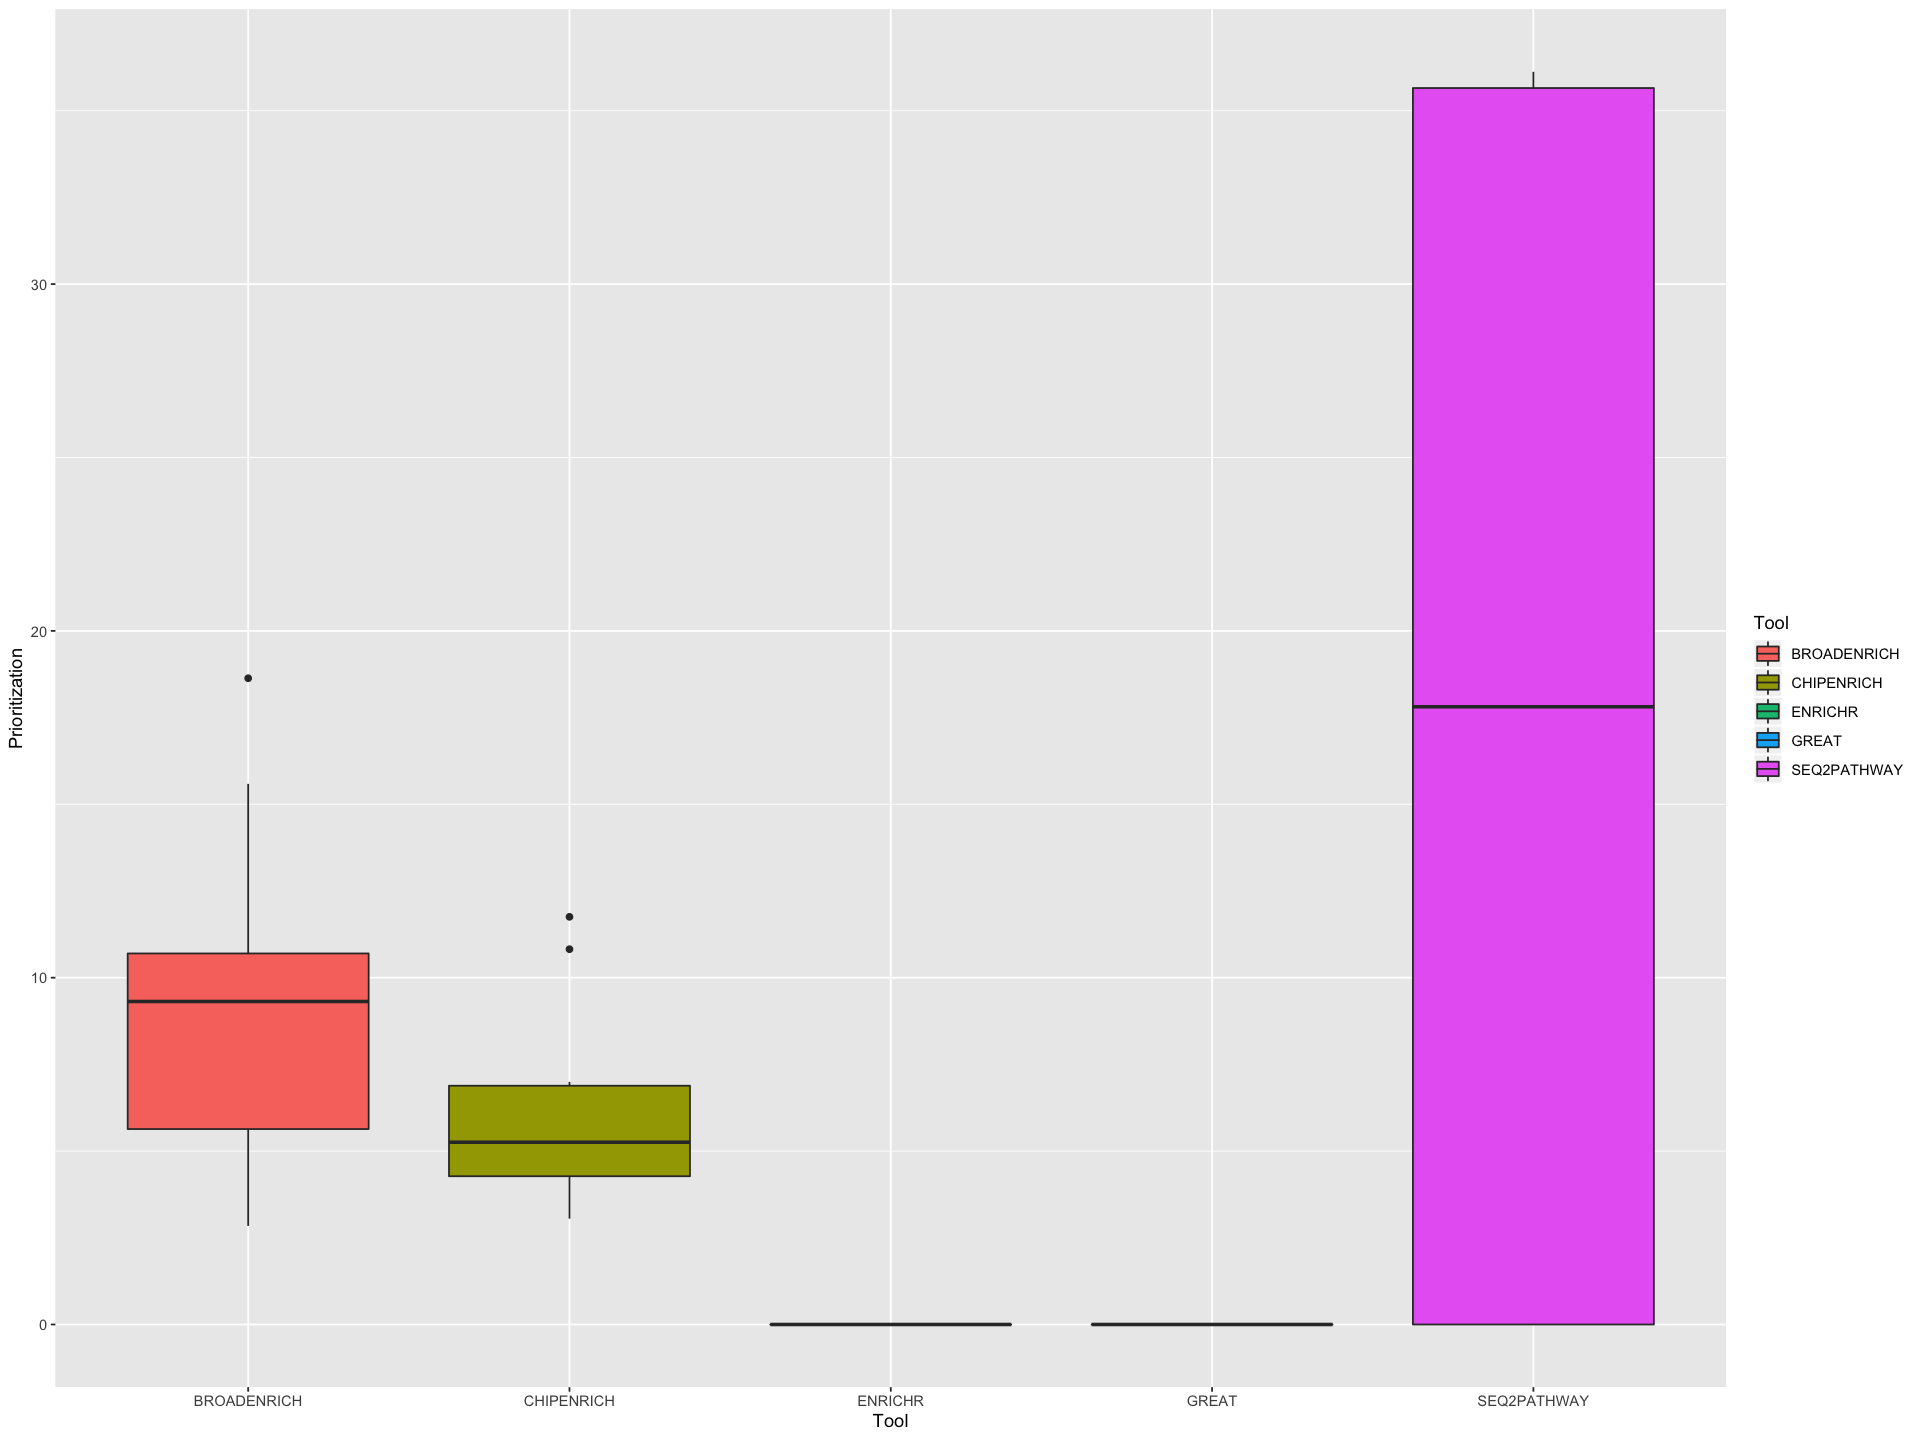

In [47]:
options(repr.plot.width=16, repr.plot.height=12) ## reframe default plot size in the jupyter notebook. 

library(tidyr) ## 'gather' function
library(ggplot2)

plotPrioritizationFinal <- gather(plotPrioritization, Tool, Prioritization_Median_Value, -Samples)
plotPrioritizationFinal$Tool <- toupper(plotPrioritizationFinal$Tool)
plotPrioritizationFinal$Tool <- substr(plotPrioritizationFinal$Tool,1,nchar(plotPrioritizationFinal$Tool)-15)
ggplot(data = plotPrioritizationFinal,
      mapping = aes(Tool, Prioritization_Median_Value, fill=Tool, na.rm = FALSE)) +
 geom_boxplot(varwidth = TRUE) +
 labs(x= "Tool", y= "Prioritization")

### Sensitivity, Specificity, and Precision